In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np
import json
from sklearn.datasets import make_blobs
from collections import Counter


In [2]:
#Converted CSV to JSON data
csvfile = open('crime_data_csv.csv', 'r')
jsonfile = open('crime_data_csv.json', 'w')

fieldnames = ("case_no","date_of_occurrence","primary_description","arrests","domestic","ward")
reader = csv.DictReader( csvfile, fieldnames)
out = json.dumps( [ row for row in reader ] )
jsonfile.write(out)

10777087

In [3]:
# Read the CSV file into a Pandas DataFrame

notes = pd.read_csv('crime_data_csv.csv')
notes.head()

,case_no,date_of_occurrence,primary_description,arrests,domestic,ward
0,JE123460,1/26/2021,0,0,1,5
1,JE123503,1/26/2021,1,0,1,20
2,JE123996,1/26/2021,2,0,0,48
3,JE123507,1/26/2021,1,0,1,21
4,JE123544,1/26/2021,3,0,0,27


In [4]:
help(pd.DataFrame.value_counts)

Help on function value_counts in module pandas.core.frame:

value_counts(self, subset: 'Optional[Sequence[Label]]' = None, normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False)
    Return a Series containing counts of unique rows in the DataFrame.
    
    .. versionadded:: 1.1.0
    
    Parameters
    ----------
    subset : list-like, optional
        Columns to use when counting unique combinations.
    normalize : bool, default False
        Return proportions rather than frequencies.
    sort : bool, default True
        Sort by frequencies.
    ascending : bool, default False
        Sort in ascending order.
    
    Returns
    -------
    Series
    
    See Also
    --------
    Series.value_counts: Equivalent method on Series.
    
    Notes
    -----
    The returned Series will have a MultiIndex with one level per input
    column. By default, rows that contain any NA values are omitted from
    the result. By default, the resulting Series will be in d

In [5]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X = notes[['primary_description','domestic','ward']]
y = notes['arrests']

print("Shape: ", X.shape, y.shape)

Shape:  (80006, 3) (80006,)


In [6]:
print(X)

       primary_description  domestic  ward
0                        0         1     5
1                        1         1    20
2                        2         0    48
3                        1         1    21
4                        3         0    27
...                    ...       ...   ...
80001                    1         1    42
80002                    5         0     3
80003                    1         1     5
80004                    1         1     7
80005                    6         0    14

[80006 rows x 3 columns]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [9]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8763082461169256
Testing Data Score: 0.8763623637636236


Make redictions

In [11]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[17525     3]
 [ 2470     4]]


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8763623637636236

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)

Counter({0: 52597, 1: 7407})

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [17]:
Counter(y_resampled)



Counter({0: 52597, 1: 52597})

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [35]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[12309,  5205],
       [ 1027,  1461]], dtype=int64)

In [36]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_preds)

0.6450139153720662

In [21]:
crime_cluster = notes.drop(axis=0,columns=['case_no','date_of_occurrence'])
crime_cluster.head()

,primary_description,arrests,domestic,ward
0,0,0,1,5
1,1,0,1,20
2,2,0,0,48
3,1,0,1,21
4,3,0,0,27


In [22]:
count_of_columns = crime_cluster.count()
count_of_columns

primary_description    80006
arrests                80006
domestic               80006
ward                   80006
dtype: int64

In [23]:
count_of_columns = crime_cluster['ward'].count()
count_of_columns

80006

Analysis of Data after Running Logical Regression

In [24]:
new_csv = pd.read_csv('crime_data_csv.csv')
new_csv[new_csv['arrests'] == 1]['ward'].value_counts().to_csv('Ward_count_arrests.csv')
ward_count = pd.read_csv('Ward_count_arrests.csv')
ward_count = ward_count.rename(columns={'Unnamed: 0':'Ward_id','ward':'Arrests_counts'})
ward_count

,Ward_id,Arrests_counts
0,28,927
1,24,598
2,27,485
3,42,467
4,6,396
5,21,393
6,17,385
7,37,375
8,16,352
9,34,332


In [25]:
ward_avg = pd.read_csv('crime_data_csv.csv')
ward_avg[ward_avg['arrests'] == 0]['ward'].value_counts().to_csv('Ward_count_nonarrests.csv')
ward_count_non = pd.read_csv('Ward_count_nonarrests.csv')
ward_count_non = ward_count_non.rename(columns={'Unnamed: 0':'Ward_id','ward':'Non_arrest_counts'})
ward_count_non



,Ward_id,Non_arrest_counts
0,27,2943
1,28,2942
2,6,2754
3,42,2690
4,8,2478
5,24,2426
6,7,2350
7,20,2309
8,17,2254
9,21,2211


In [26]:
# Add prediected values onto the original dataframe
# combined_ward = pd.DataFrame(ward_count, columns=['Ward_id'])
# combined = ward_count_non.merge(combined_ward, how='right')
# combined_ward.head()
merge_database = ward_count.merge(ward_count_non, on='Ward_id', how='inner')
merge_database.head()

,Ward_id,Arrests_counts,Non_arrest_counts
0,28,927,2942
1,24,598,2426
2,27,485,2943
3,42,467,2690
4,6,396,2754


<AxesSubplot:>

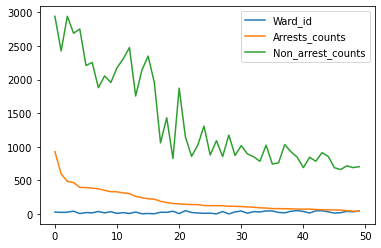

In [27]:
merge_database.plot()

In [28]:
merge_database.dtypes

Ward_id              int64
Arrests_counts       int64
Non_arrest_counts    int64
dtype: object

In [29]:
merge_database['Arrests_counts']= merge_database['Arrests_counts'].astype(float)
merge_database['Non_arrest_counts']= merge_database['Non_arrest_counts'].astype(float)


In [30]:
merge_database.dtypes

Ward_id                int64
Arrests_counts       float64
Non_arrest_counts    float64
dtype: object

In [31]:
merge_database.head()

,Ward_id,Arrests_counts,Non_arrest_counts
0,28,927.0,2942.0
1,24,598.0,2426.0
2,27,485.0,2943.0
3,42,467.0,2690.0
4,6,396.0,2754.0


<AxesSubplot:>

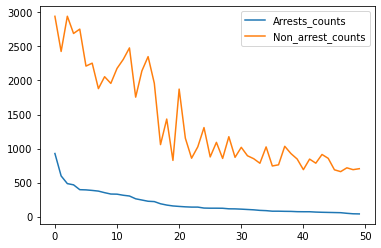

In [32]:
merge_database[['Arrests_counts', 'Non_arrest_counts']].plot()

In [33]:
merge_database.describe()

,Ward_id,Arrests_counts,Non_arrest_counts
count,50.00000,50.000000,50.000000
mean,25.50000,197.900000,1402.220000
std,14.57738,171.925263,718.261685
min,1.00000,40.000000,661.000000
25%,13.25000,78.500000,847.250000
50%,25.50000,125.000000,1029.000000
75%,37.75000,292.750000,2031.000000
max,50.00000,927.000000,2943.000000


In [34]:
d3.json("samples.json").then(function(data){
    console.log("hello");
});

SyntaxError: invalid syntax (<ipython-input-34-c50a5e044773>, line 1)